# 01-CIFAR10

![](https://images.unsplash.com/photo-1493723843671-1d655e66ac1c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [LUM3N](https://unsplash.com/photos/-RBuQ2PK_L8)


We will work on the CIFAR10 dataset. If you want to know more about this dataset, you can check information [here](https://www.cs.toronto.edu/~kriz/cifar.html).

You can download the CIFAR10 dataset using Keras. To know how to do it, check [here](https://keras.io/datasets/). If the memory of your laptop is not big (e.g. 4GB), take only a subsample of the CIFAR10 dataset: for example 10000 samples in train and 2000 in test.

# The CIFAR-100 dataset

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 50000 training images and 10000 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:

## Superclass 	Classes
- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

## Import

In [44]:
import numpy as np
import matplotlib.pyplot as plt #Visu
import matplotlib.image as mpimg
from keras.datasets import cifar10 #data
from keras import utils #one hot encoding
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, TensorBoard
from skimage.color import rgb2gray

In [51]:
# TODO: Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [52]:
x_train = rgb2gray(x_train)
x_test = rgb2gray(x_test)

In [53]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32), (50000, 1), (10000, 32, 32), (10000, 1))

In [22]:
labels = ['airplane', 'automobile', 'bird','cat' ,'deer' ,'dog' ,'frog' ,'horse' ,'ship' ,'truck']

In [57]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [54]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 1024), (50000, 1), (10000, 1024), (10000, 1))

Now inspect the data, check the number of images, their sizes, and display some of them.

Text(0.5,1,'cat')

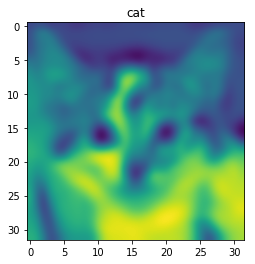

In [86]:
# TODO: Explore the data, display some input images

ids = np.random.randint(0, 50000)
img = plt.imshow(x_train[ids], interpolation="bicubic")

plt.title(labels[y_train[ids][0]])

Make the data preprocessing now: rescale the input data, put the labels to one hot encoding (e.g. to categorical)

In [56]:
# TODO: Make the data preparation
#Scaling

X_train = X_train / 255.
X_test = X_test / 255.

#categized labels
y_train_cat = utils.to_categorical(y_train, dtype='float32')
y_test_cat = utils.to_categorical(y_test, dtype='float32')

Now build your model with Keras. Build your neural network architecture.

Again, begin with a quite light architecture with 3 hidden layers and 30 units per layer.

In [89]:
# TODO: Build your model

def model_three_layers(input_dim):

    model = Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(Dense(30, input_dim=input_dim, name='0', activation='relu'))

    # Add four more layers of 100 units
    model.add(Dense(30, name='1', activation='relu'))
    model.add(Dense(30, name='2', activation='relu'))
    
    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model

Now compile and fit your model on your training data. Add callbacks to have early stopping (with a patience of 30 epochs for example) and tensorboard information.

In [90]:
# TODO: Build your model
model = model_three_layers(input_dim=X_train.shape[1])

# Compile the model with mean squared error (for regression)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=5), TensorBoard(log_dir='./src', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, update_freq='epoch') ]

# Now fit the model on 500 epoches with a batch size of 64
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=100, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 147us/step - loss: 2.2009 - acc: 0.1574 - val_loss: 2.1505 - val_acc: 0.1949
Epoch 2/100
50000/50000 [==============================] - 5s 104us/step - loss: 2.1271 - acc: 0.2104 - val_loss: 2.1012 - val_acc: 0.2377
Epoch 3/100
50000/50000 [==============================] - 5s 105us/step - loss: 2.0700 - acc: 0.2478 - val_loss: 2.0506 - val_acc: 0.2602
Epoch 4/100
50000/50000 [==============================] - 5s 106us/step - loss: 2.0443 - acc: 0.2589 - val_loss: 2.0441 - val_acc: 0.2622
Epoch 5/100
50000/50000 [==============================] - 5s 107us/step - loss: 2.0280 - acc: 0.2657 - val_loss: 2.0189 - val_acc: 0.2742
Epoch 6/100
50000/50000 [==============================] - 5s 108us/step - loss: 2.0102 - acc: 0.2747 - val_loss: 2.0068 - val_acc: 0.2793
Epoch 7/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.9932 - acc: 0.2792 - val_loss: 1.

50000/50000 [==============================] - 5s 102us/step - loss: 1.7614 - acc: 0.3661 - val_loss: 1.7837 - val_acc: 0.3648
Epoch 60/100
50000/50000 [==============================] - 5s 104us/step - loss: 1.7607 - acc: 0.3661 - val_loss: 1.7997 - val_acc: 0.3544
Epoch 61/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.7581 - acc: 0.3692 - val_loss: 1.7864 - val_acc: 0.3644
Epoch 62/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.7553 - acc: 0.3720 - val_loss: 1.7876 - val_acc: 0.3628
Epoch 63/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.7548 - acc: 0.3712 - val_loss: 1.7842 - val_acc: 0.3628
Epoch 64/100
50000/50000 [==============================] - 6s 110us/step - loss: 1.7528 - acc: 0.3721 - val_loss: 1.7864 - val_acc: 0.3632
Epoch 65/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.7513 - acc: 0.3716 - val_loss: 1.7806 - val_acc: 0.3651
Epoch 66/100
50000/50000 [=======

In [71]:
from keras import regularizers

def model_five_layers(input_dim):

    model = Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(Dense(100, input_dim=input_dim, activation='tanh'))

    # Add four more layers of 100 units
    model.add(Dense(100, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(100, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(100, activation='tanh'))
    
    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model

In [72]:
# TODO: Build your model
model = model_five_layers(input_dim=X_train.shape[1])

# Compile the model with mean squared error (for regression)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=5), TensorBoard(log_dir='./src', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, update_freq='epoch') ]

# Now fit the model on 500 epoches with a batch size of 64
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=200, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 11s 210us/step - loss: 2.3427 - acc: 0.1580 - val_loss: 2.1854 - val_acc: 0.1777
Epoch 2/200
50000/50000 [==============================] - 8s 162us/step - loss: 2.1788 - acc: 0.1669 - val_loss: 2.1735 - val_acc: 0.1765
Epoch 3/200
50000/50000 [==============================] - 9s 177us/step - loss: 2.1734 - acc: 0.1706 - val_loss: 2.1679 - val_acc: 0.1841
Epoch 4/200
50000/50000 [==============================] - 8s 161us/step - loss: 2.1691 - acc: 0.1713 - val_loss: 2.1662 - val_acc: 0.1773
Epoch 5/200
50000/50000 [==============================] - 8s 160us/step - loss: 2.1681 - acc: 0.1721 - val_loss: 2.1722 - val_acc: 0.1626
Epoch 6/200
50000/50000 [==============================] - 8s 161us/step - loss: 2.1683 - acc: 0.1716 - val_loss: 2.1625 - val_acc: 0.1741
Epoch 7/200
50000/50000 [==============================] - 8s 164us/step - loss: 2.1654 - acc: 0.1721 - val_loss: 2

KeyboardInterrupt: 

Compute the accuracy of your model once it has been trained.

In [93]:
# TODO: Compute the accuracy of your model
score = model.evaluate(X_test, y_test_cat, verbose=0) 
score[1]

0.3739

What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? Feel free to try.

To have a better understanding of your model, you can also check the learning curves on TensorBoard and interpret them.

One solution to improve your model might be data augmentation. For example, we can flip horizontally our images. Basically, this would be like watching them into a mirror.

To do so, you can use numpy method `flip` for example, and then display a flipped image and the regular image.

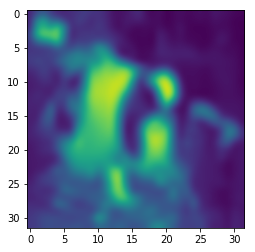

In [105]:
# TODO: Augment your data by flipping images horizontally
img = np.flip(x_train, axis=2)
ids = np.random.randint(0, 50000)
plt.imshow(img[ids], interpolation="bicubic")

#plt.title(labels[y_train[ids]])

Now concatenate your training set to have both regular and flipped images in it. Do the same for the associated labels (labels remain the same for flipped images). If your computer memory is not big enough, flip only a subsample of images.

In [ ]:
# TODO: Create a new training set with both regular and flipped images


Once your data is augmented, retrain your model, and see if it can improve your performances.

In [ ]:
# TODO: train your model and display the performances


Does it improve your performances?

Now feel free to improve the performances of your model by making more data augmentation, trying to add layers or units, or playing with hyperparameters.